In [1]:
#boston housing priceing code same ha ussi py kam krhy hyn chapter 3

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import os
import matplotlib.pyplot as plt
import seaborn as sms 
from keras import models
from keras import layers



Using TensorFlow backend.


In [2]:
dataframe=pd.read_csv('Concrete_Data_Yeh.csv')

In [3]:
dataframe.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df=dataframe.sample(frac=1)

In [7]:
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
985,255.3,98.8,77.0,188.6,6.5,919.0,749.3,28,33.80
775,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,22.44
816,525.0,0.0,0.0,189.0,0.0,1125.0,613.0,7,42.42
513,424.0,22.0,132.0,168.0,8.9,822.0,750.0,7,40.29
228,168.0,42.1,163.8,121.8,5.7,1058.7,780.1,100,39.23


In [8]:
concrete = df.values


In [9]:
x_train_data = concrete[:824,:8].astype('float') 
y_train_label = concrete[:824,8]
x_test_data = concrete[824:,:8].astype('float')
y_test_label = concrete[824:,8]

In [10]:
print(x_train_data.shape)
print(y_train_label.shape)
print(x_test_data.shape)
print(y_test_label.shape)

(824, 8)
(824,)
(206, 8)
(206,)


In [11]:
mean=x_train_data.mean(axis=0)
x_train_data-=mean
std=x_train_data.std(axis=0)
x_train_data/=std
x_test_data-=mean
x_test_data/=std

# Step: 3 slicing for validation

In [12]:

x_val=x_train_data[:103] #totl 40k hain jisme se validation me 10k ja rahe hain
partial_x_train=x_train_data[103:] #or baki partial me ja rahe ha
y_val=y_train_label[:103]
partial_y_train=y_train_label[103:]


In [13]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(partial_x_train.shape[1],)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1))
model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])

    

In [14]:
history=model.fit(partial_x_train,partial_y_train,epochs=100,batch_size=30,validation_data=(x_val,y_val)) 

Train on 721 samples, validate on 103 samples
Epoch 1/100
721/721 [==============================] - 0s 261us/step - loss: 1489.8627 - mae: 34.5517 - val_loss: 945.3545 - val_mae: 27.8548
Epoch 2/100
721/721 [==============================] - 0s 104us/step - loss: 1204.1323 - mae: 30.3662 - val_loss: 713.7203 - val_mae: 23.5521
Epoch 3/100
721/721 [==============================] - 0s 122us/step - loss: 887.7994 - mae: 25.2065 - val_loss: 466.7911 - val_mae: 18.2460
Epoch 4/100
721/721 [==============================] - 0s 105us/step - loss: 582.9743 - mae: 19.5425 - val_loss: 287.3588 - val_mae: 13.4759
Epoch 5/100
721/721 [==============================] - 0s 69us/step - loss: 357.1644 - mae: 15.0192 - val_loss: 175.3801 - val_mae: 9.7445
Epoch 6/100
721/721 [==============================] - 0s 60us/step - loss: 249.8480 - mae: 12.6974 - val_loss: 160.3305 - val_mae: 9.7925
Epoch 7/100
721/721 [==============================] - 0s 68us/step - loss: 222.0753 - mae: 11.9760 - val_loss

Epoch 60/100
721/721 [==============================] - 0s 72us/step - loss: 61.9422 - mae: 6.1643 - val_loss: 54.3440 - val_mae: 5.8167
Epoch 61/100
721/721 [==============================] - 0s 62us/step - loss: 60.6643 - mae: 6.0710 - val_loss: 50.8735 - val_mae: 5.3852
Epoch 62/100
721/721 [==============================] - 0s 69us/step - loss: 59.7782 - mae: 5.9883 - val_loss: 48.7903 - val_mae: 5.4126
Epoch 63/100
721/721 [==============================] - 0s 71us/step - loss: 58.2253 - mae: 5.9098 - val_loss: 47.2546 - val_mae: 5.3152
Epoch 64/100
721/721 [==============================] - 0s 57us/step - loss: 57.4525 - mae: 5.8400 - val_loss: 45.7112 - val_mae: 5.1372
Epoch 65/100
721/721 [==============================] - 0s 53us/step - loss: 56.8364 - mae: 5.7922 - val_loss: 45.9259 - val_mae: 5.1760
Epoch 66/100
721/721 [==============================] - 0s 60us/step - loss: 55.4796 - mae: 5.7587 - val_loss: 45.6619 - val_mae: 5.2513
Epoch 67/100
721/721 [===================

In [15]:
val_mse,val_mae=model.evaluate(x_val,y_val,verbose=0)
print(val_mse)
print(val_mae)


30.13053901450148
4.183291435241699


In [16]:
history_dict=history.history

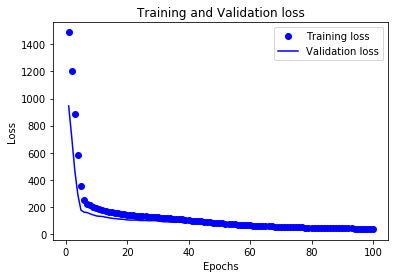

KeyError: 'accuracy'

In [19]:

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs,loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.clf
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(acc_values)+1)
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()
plt.clf

In [52]:
def built_model():
    model=models.Sequential() 
    #layers.Dense jb likhty hyn jb tensor flow frontend py chale
    #backend py dense krty hyn bs 
    model.add(layers.Dense(8,activation='tanh',input_shape=(xtrain.shape[1],))) # 8 jo likha ha yh nodes hyn
    model.add(layers.Dense(6,activation='tanh'))
    model.add(layers.Dense(1))
    #compile model using mse as a measure of model performance
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model

In [53]:
model=built_model()
history=model.fit(xtrain,ytrain,epochs=200,validation_data=(xtest,ytest))

Train on 824 samples, validate on 206 samples
Epoch 1/200
824/824 [==============================] - 0s 190us/step - loss: 1567.8572 - mae: 35.9160 - val_loss: 1473.1259 - val_mae: 34.5712
Epoch 2/200
824/824 [==============================] - 0s 57us/step - loss: 1531.6155 - mae: 35.4026 - val_loss: 1440.3710 - val_mae: 34.0920
Epoch 3/200
824/824 [==============================] - 0s 76us/step - loss: 1497.9303 - mae: 34.9215 - val_loss: 1408.0583 - val_mae: 33.6126
Epoch 4/200
824/824 [==============================] - 0s 38us/step - loss: 1465.2384 - mae: 34.4445 - val_loss: 1376.7876 - val_mae: 33.1422
Epoch 5/200
824/824 [==============================] - 0s 76us/step - loss: 1433.5647 - mae: 33.9853 - val_loss: 1346.8294 - val_mae: 32.6856
Epoch 6/200
824/824 [==============================] - 0s 76us/step - loss: 1404.1530 - mae: 33.5449 - val_loss: 1320.0646 - val_mae: 32.2762
Epoch 7/200
824/824 [==============================] - 0s 76us/step - loss: 1377.0502 - mae: 33.1403 

824/824 [==============================] - 0s 57us/step - loss: 442.2337 - mae: 16.5434 - val_loss: 413.7602 - val_mae: 15.8931
Epoch 117/200
824/824 [==============================] - 0s 38us/step - loss: 437.7797 - mae: 16.4505 - val_loss: 409.7006 - val_mae: 15.8078
Epoch 118/200
824/824 [==============================] - 0s 57us/step - loss: 433.3599 - mae: 16.3576 - val_loss: 405.6262 - val_mae: 15.7240
Epoch 119/200
824/824 [==============================] - 0s 38us/step - loss: 429.0889 - mae: 16.2692 - val_loss: 401.7883 - val_mae: 15.6476
Epoch 120/200
824/824 [==============================] - 0s 38us/step - loss: 424.7867 - mae: 16.1823 - val_loss: 397.8652 - val_mae: 15.5730
Epoch 121/200
824/824 [==============================] - 0s 38us/step - loss: 420.5898 - mae: 16.0950 - val_loss: 394.1233 - val_mae: 15.5031
Epoch 122/200
824/824 [==============================] - 0s 76us/step - loss: 416.3746 - mae: 16.0087 - val_loss: 390.2813 - val_mae: 15.4314
Epoch 123/200
824/82

In [40]:

test_mse_score, test_mae_score = model.evaluate(x_test_data,y_test_label)
test_mse_score


206/206 [==============================] - 2s 12ms/step


44.217131086923544

In [54]:
#chatbot
#dialougebox
#guru 
#fiver
#rest api
#online parapharasing
#refreasher 
# unique keyword 

In [ ]:
plt.plot()